Matthew Edwards
DASC 2113
Dr. Jackson Cothren
12-13-2022
Final Takehome Exam

Importing of needed libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Read in the Data.

In [87]:
df = pd.read_csv("data/Covid Data.csv")

Take a look at the data

In [88]:
df.head

<bound method NDFrame.head of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2   

It appears there is a mix of categorical and a couple of dates as well as a couple of numerical peices of data.

In [89]:
df["CARDIOVASCULAR"].unique()

array([ 2,  1, 98])

Also the dataset uses 1 and 2 as booleans unsure which is which and fills in missing data with things that aren't 1 or 2. It appears the first challenge will be getting the data into a workable state, removing missing values from categorical columns. Also it would be better if the data column were a categorical died boolean rather than a date for easy access, same thing with intubation.

In [90]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df["DEATH"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [91]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


In [92]:
df["INTUBED"].value_counts()

97    833253
2     156712
1      33034
99      2153
Name: INTUBED, dtype: int64

In [93]:
print(df.columns)
print(df.shape)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')
(1025152, 22)


The dataset doesn't mention how missing data in the intubed column can be rectified so I have to assume it can't be rectified and I need to make a choice of whether to only use 10% of the data insisting that INTUBED is a neccessary part of the analysis or I need to use 100% of the data and simply mark "INTUBED" as worthless. For now I will do both.

In [94]:
df_intubed_inc = df[(df.INTUBED == 1) | (df.INTUBED == 2)]
df.drop(columns=["INTUBED","DATE_DIED"], inplace=True)

Looking through the dataset more throughly on Kaggle apparently there are people who aren't even diagnosed with covid-19 in the data

In [95]:
#check for values that indicate no covid, only 1 2 or 3 are valid values
df["CLASIFFICATION_FINAL"].value_counts()
#drop all values of patients that aren't diagnosed with covid/inconclusive results
df = df[(df.CLASIFFICATION_FINAL == 1) | (df.CLASIFFICATION_FINAL== 2) | (df.CLASIFFICATION_FINAL == 3)]
df_intubed_inc = df[(df.CLASIFFICATION_FINAL == 1) | (df.CLASIFFICATION_FINAL== 2) | (df.CLASIFFICATION_FINAL == 3)]

In [96]:
#check shapes
print(df.shape)
print(df_intubed_inc.shape)

(388878, 20)
(388878, 20)


After clearing out patients that weren't diagnosed with covid the dataframes are the same shape so this was probably only a value that is intentionally recorded everytime with covid and some other diseases. From here on all focus will be on df rather than df_intubed_inc as these are the same.

In [97]:
(df == df_intubed_inc).value_counts()
#388878 entirely matching rows

USMER  MEDICAL_UNIT  SEX   PATIENT_TYPE  PNEUMONIA  AGE   PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU   DEATH
True   True          True  True          True       True  True      True      True  True    True     True          True           True            True     True           True     True                  True  True     388878
dtype: int64

After all of this I think the only thing I need to do to finish cleaning the dataframe is to change relevant categorical columns from 1 for true and 2 for false to 1 for true and 0 for false for my own sanity.

In [98]:
df.reset_index(inplace = True)

VERY INEFFICIENT CODE BELOW DONT RUN UNLESS YOU NEED TO TAKES ATLEAST 4 MINS TO CHANGE NUMBERS WHICH IS ONLY COSMETIC

In [99]:
list = ["PNEUMONIA","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","RENAL_CHRONIC","TOBACCO","ICU", "CARDIOVASCULAR", "OBESITY"]
#careful running this took 2 mins don't know if this can be done more efficiently
for i in df.index:
    for x in list:
        if df[x].iloc[i] == 2:
            df[x].iloc[i] = 0
        
    


VERY INEFFICIENT CODE ABOVE TAKES UPWARDS OF 4 MINS DONT RUN UNLESS YOU NEED TO

In [100]:

for x in list:
    print(df[x].value_counts())


0    304091
1     84787
Name: PNEUMONIA, dtype: int64
0    327218
1     61660
Name: DIABETES, dtype: int64
0    382800
1      6078
Name: COPD, dtype: int64
0    378527
1     10351
Name: ASTHMA, dtype: int64
0    384148
1      4730
Name: INMSUPR, dtype: int64
0    312668
1     76210
Name: HIPERTENSION, dtype: int64
0    378927
1      9951
Name: OTHER_DISEASE, dtype: int64
0    380985
1      7893
Name: RENAL_CHRONIC, dtype: int64
0    360335
1     28543
Name: TOBACCO, dtype: int64
97    279109
0      98056
1      10217
99      1496
Name: ICU, dtype: int64
0    380460
1      8418
Name: CARDIOVASCULAR, dtype: int64
0    316619
1     72259
Name: OBESITY, dtype: int64


worked for everything except tobacco which has missing values. Not going to try to fix and tobacco will have to be a useless column since I can't rectify the data

In [101]:
df.drop(columns = ["TOBACCO"], inplace = True)

I believe the data is now clean enough to begin working on an analysis the first step will be to choose a target variable. I think I will start with trying to see if Death by Covid can be predicted by any of the other columns. I feel that Age has the most promise for this but will look into how others can be incorporated in a MV analysis.

In [102]:
df_indep = df.drop(columns = "DEATH")
df_target = df.DEATH

Now to split into train and test dfs

In [105]:
train_x, test_x, train_y, test_y = train_test_split(df_indep, df_target, test_size = .2, random_state=0)

print("Training data shape: ", train_x.shape, train_y.shape)

# Print the shape of the test set
print("Test data shape: ", test_x.shape, test_y.shape)



Training data shape:  (311102, 19) (311102,)
Test data shape:  (77776, 19) (77776,)


EDA

/var/folders/g1/zqf5lj9d3pl42gp312k5dc1m0000gn/T/ipykernel_16818/502085861.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_x.hist(grid = False, ax = axs, bins = 30, edgecolor = "darkgrey")


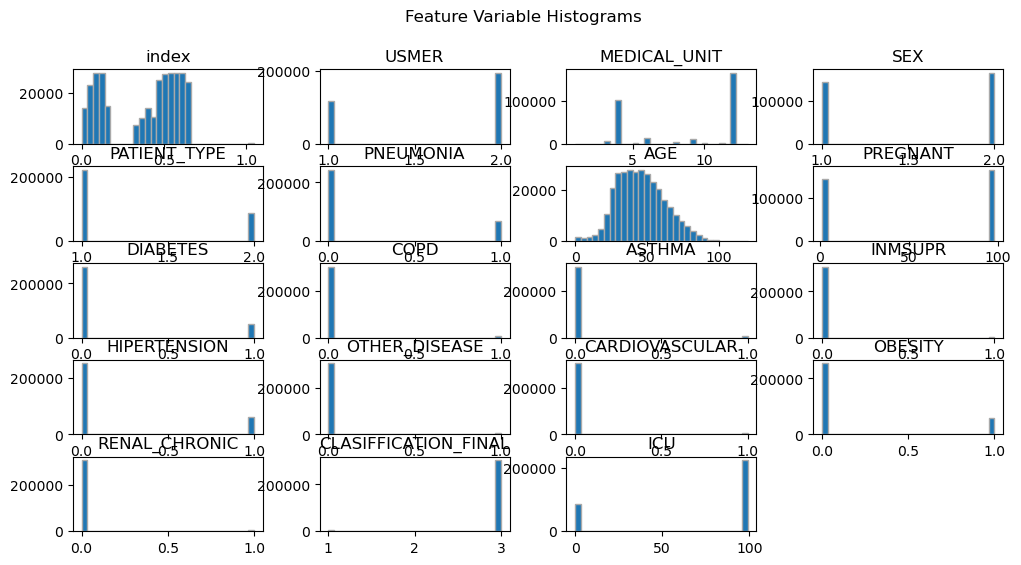

In [109]:
fig, axs = plt.subplots(figsize = (12,6))
train_x.hist(grid = False, ax = axs, bins = 30, edgecolor = "darkgrey")
plt.suptitle("Feature Variable Histograms")
plt.show()

From looking at these histograms we can see that some of the features only make an appearance in a very small amount of the dataset. Features to look for are COPD, immunosupprussed, cardiovascular, other disease, renal_chronic. While these may in fact be important contributors to determination of the deadliness of COVID I do have to wonder how well I can show that with such a small amount of the sample containing these risk factors. It may have been in my better interest to combine all of these into a single "additional risk factors column" a numeric value containing a count of the additional risk factors this person was associated with. Also upon further inspection my datacleaning was not nearly as effective as initially thought but I think I've done enough to get the columns of interest.

In [111]:
# Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(train_x, train_y)
prediction=mod_lr.predict(test_x)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,test_y)))

/Users/matthewedwards/opt/miniconda3/envs/dasc2113/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/matthewedwards/opt/miniconda3/envs/dasc2113/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


The accuracy of the Logistic Regression is 0.935


/Users/matthewedwards/opt/miniconda3/envs/dasc2113/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Linear Regression returned a 93.5 percent accuracy using all columns of the dataframe. 

In [118]:
print(test_y.value_counts())
print(10774/67002)

0    67002
1    10774
Name: DEATH, dtype: int64
0.16080117011432493


From this we can see the model is at the least more accurate than marking everyone as living.

Confusion matrix:

/Users/matthewedwards/opt/miniconda3/envs/dasc2113/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


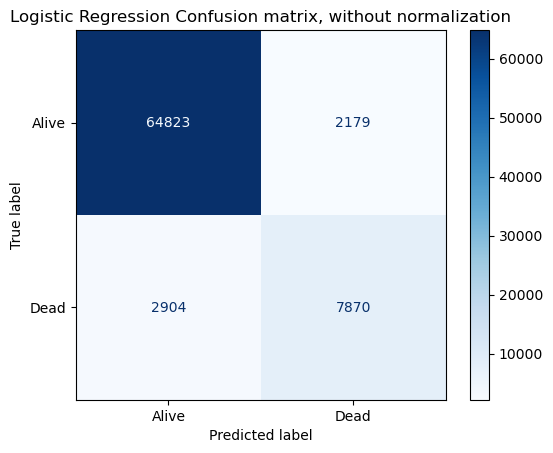

In [114]:
cn = ["Alive", "Dead"]
disp = metrics.plot_confusion_matrix(mod_lr, test_x, test_y,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Logistic Regression Confusion matrix, without normalization');

In [124]:
print("Recall of death: " )
print((7870/(7870 + 2904)))
print("Precision of death: ")
print(7870/(7870+2179))

Recall of death: 
0.7304622238722851
Precision of death: 
0.7831625037317146


Final Review of my analysis:
Accuracy : 93.5
Recall of Death: 73.0
Precision of Death: 78.0

I believe Logistic Regression is the right model to use for this because we are using so many variables to classify a patient into a category. Logistic Regression is known for its ability to predict likelihood of events occuring so thats why I chose it from the models we have used.

I think one reason this model may not have performed very well was my forgetfulness to stratify the train/test sets. More than likely this would instantly perform better with this.Another reason this model may not have performed as well is because there were numerous independent variables being thrown in. It may have better served to combine some of the variables that covered a vast minority of the population into a single risk or preexisting condition column rather than having so many variables. There is a possibility that this could overfit if a presexisting condition that didnt contribute to deadliness outnumbered the other values that did so this isnt a shoe-in. In fact I'm glad that I didn't combine the columns because logistic regression should be able to pick apart the different variables and determine which are not correlated so combining them would have just caused more confusion in the model.

Considering this model has to do with healthcare with the intent of identifying those that are at most risk of dying and providing them with additional care false positives are dangerous as they suck away precious ICU space from those who really need it. But also false negatives are terrible as well since people that could need to be marked for additonal care wouldnt recieve it. So I feel there are definitely improvements to be made.

My final reccommendation would be if there wasn't a perfect model out there with perfect recall and precision to use two different models depending on available ICU space. Essentially translate the already very well theorized ideas of triage directly into how we predict the need for additional care. One model with high precision when ICU space is plentiful and the pandemic is not as widespread to contain the illness more totally. And another with high recall when ICU space has dropped. I believe this something similar to this was implemented heavily in New York City at the start of the pandemic when hospitals were overrun.

For completeness:

In [123]:
print("Precision of Alive:")
print(64823/(64823+2904))
print("Recall of Alive:")
print(64823/(64823+2179))

0.9571219749878187
0.9674785827288738
